In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
df = pd.read_csv('cancer_classification.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<Axes: xlabel='benign_0__mal_1', ylabel='count'>

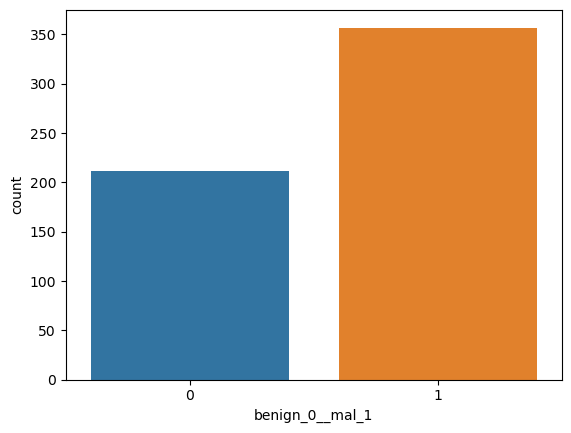

In [6]:
sns.countplot(x='benign_0__mal_1',data=df)

In [7]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


<Axes: >

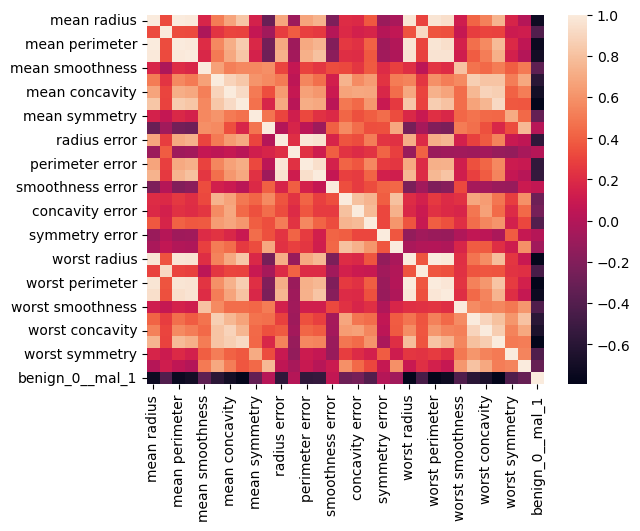

In [8]:
sns.heatmap(df.corr(numeric_only=True))

In [9]:
X=df.drop('benign_0__mal_1',axis=1).values
y=df["benign_0__mal_1"].values

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.33,random_state=101)

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()

In [13]:
X_train = scaler.fit_transform(X_train)

In [14]:
X_test = scaler.transform(X_test)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [16]:
X_train.shape

(381, 30)

In [17]:
model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [18]:
model.compile(loss='binary_crossentropy',optimizer='adam')

In [19]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.6826 - val_loss: 0.6421
Epoch 2/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6278 - val_loss: 0.5982
Epoch 3/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5756 - val_loss: 0.5593
Epoch 4/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5454 - val_loss: 0.5232
Epoch 5/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4944 - val_loss: 0.4831
Epoch 6/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4465 - val_loss: 0.4379
Epoch 7/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4096 - val_loss: 0.3968
Epoch 8/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3684 - val_loss: 0.3596
Epoch 9/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3336 - val_loss: 0.3265
Epoch 10/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2976 - val_loss: 0.2978
Epoch 11/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2820 - val_loss: 0.2761
Epoch 12/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0413 - val_loss: 0.1339
Epoch 70/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0430 - val_loss: 0.1349
Epoch 71/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0419 - val_loss: 0.1345
Epoch 72/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0479 - val_loss: 0.1346
Epoch 73/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0410 - val_loss: 0.1362
Epoch 74/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0528 - val_loss: 0.1352
Epoch 75/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0436 - val_loss: 0.1362
Epoch 76/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0469 - val_loss: 0.1347
Epoch 77/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0411 - val_loss: 0.1350
Epoch 78/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0505 - val_loss: 0.1347
Epoch 79/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0434 - val_loss: 0.1346
Epoch 80/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0351 

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0269 - val_loss: 0.1509
Epoch 138/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0229 - val_loss: 0.1472
Epoch 139/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0332 - val_loss: 0.1478
Epoch 140/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0339 - val_loss: 0.1523
Epoch 141/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0306 - val_loss: 0.1474
Epoch 142/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0266 - val_loss: 0.1479
Epoch 143/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0413 - val_loss: 0.1486
Epoch 144/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0294 - val_loss: 0.1500
Epoch 145/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0215 - val_loss: 0.1486
Epoch 146/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0226 - val_loss: 0.1502
Epoch 147/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0306 - val_loss: 0.1494
Epoch 148/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - lo

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0413 - val_loss: 0.1604
Epoch 205/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0280 - val_loss: 0.1618
Epoch 206/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0186 - val_loss: 0.1607
Epoch 207/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0417 - val_loss: 0.1641
Epoch 208/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0359 - val_loss: 0.1619
Epoch 209/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0320 - val_loss: 0.1629
Epoch 210/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0236 - val_loss: 0.1628
Epoch 211/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0440 - val_loss: 0.1634
Epoch 212/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0332 - val_loss: 0.1644
Epoch 213/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0304 - val_loss: 0.1632
Epoch 214/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0271 - val_loss: 0.1619
Epoch 215/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - lo

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0213 - val_loss: 0.1794
Epoch 272/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0160 - val_loss: 0.1804
Epoch 273/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0237 - val_loss: 0.1802
Epoch 274/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0266 - val_loss: 0.1786
Epoch 275/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0300 - val_loss: 0.1802
Epoch 276/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0218 - val_loss: 0.1797
Epoch 277/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0289 - val_loss: 0.1810
Epoch 278/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0271 - val_loss: 0.1820
Epoch 279/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0292 - val_loss: 0.1823
Epoch 280/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0205 - val_loss: 0.1844
Epoch 281/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0292 - val_loss: 0.1862
Epoch 282/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - lo

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0271 - val_loss: 0.2065
Epoch 339/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0266 - val_loss: 0.2073
Epoch 340/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0195 - val_loss: 0.2064
Epoch 341/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0179 - val_loss: 0.2067
Epoch 342/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0238 - val_loss: 0.2067
Epoch 343/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0197 - val_loss: 0.2068
Epoch 344/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0193 - val_loss: 0.2064
Epoch 345/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0230 - val_loss: 0.2060
Epoch 346/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0193 - val_loss: 0.2072
Epoch 347/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0141 - val_loss: 0.2082
Epoch 348/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0168 - val_loss: 0.2089
Epoch 349/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - lo

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0211 - val_loss: 0.2408
Epoch 406/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0161 - val_loss: 0.2413
Epoch 407/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0147 - val_loss: 0.2429
Epoch 408/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0136 - val_loss: 0.2434
Epoch 409/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0192 - val_loss: 0.2452
Epoch 410/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0121 - val_loss: 0.2448
Epoch 411/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0137 - val_loss: 0.2460
Epoch 412/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0117 - val_loss: 0.2472
Epoch 413/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0199 - val_loss: 0.2486
Epoch 414/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0116 - val_loss: 0.2488
Epoch 415/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0176 - val_loss: 0.2497
Epoch 416/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - lo

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0119 - val_loss: 0.2896
Epoch 473/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0129 - val_loss: 0.2895
Epoch 474/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0096 - val_loss: 0.2915
Epoch 475/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0127 - val_loss: 0.2902
Epoch 476/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0178 - val_loss: 0.2908
Epoch 477/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0096 - val_loss: 0.2951
Epoch 478/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0163 - val_loss: 0.2938
Epoch 479/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0114 - val_loss: 0.2952
Epoch 480/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0075 - val_loss: 0.2943
Epoch 481/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0113 - val_loss: 0.2948
Epoch 482/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0117 - val_loss: 0.2958
Epoch 483/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - lo

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0082 - val_loss: 0.3414
Epoch 540/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0077 - val_loss: 0.3393
Epoch 541/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0089 - val_loss: 0.3459
Epoch 542/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0152 - val_loss: 0.3476
Epoch 543/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0097 - val_loss: 0.3449
Epoch 544/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0105 - val_loss: 0.3461
Epoch 545/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0104 - val_loss: 0.3432
Epoch 546/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0137 - val_loss: 0.3378
Epoch 547/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0153 - val_loss: 0.3567
Epoch 548/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0090 - val_loss: 0.3372
Epoch 549/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0161 - val_loss: 0.3410
Epoch 550/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - lo

In [20]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,0.671287,0.642110
1,0.615434,0.598187
2,0.568212,0.559288
3,0.528778,0.523225
4,0.487833,0.483101
...,...,...
595,0.007020,0.379437
596,0.007221,0.377027
597,0.009255,0.388834
598,0.012887,0.369029


<Axes: >

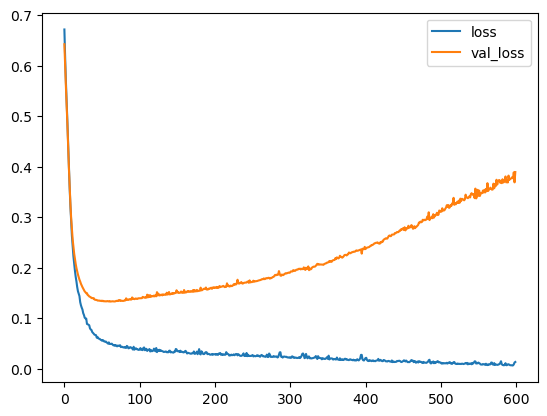

In [21]:
pd.DataFrame(model.history.history).plot()

In [22]:
model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
help(EarlyStopping)

Help on class EarlyStopping in module keras.src.callbacks.early_stopping:

class EarlyStopping(keras.src.callbacks.callback.Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False, start_from_epoch=0)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |      monitor: Quantity to be monitored. Defaults 

In [26]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience = 25)

In [28]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0059 - val_loss: 0.4834
Epoch 2/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0047 - val_loss: 0.4844
Epoch 3/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0021 - val_loss: 0.4832
Epoch 4/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0028 - val_loss: 0.4854
Epoch 5/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0044 - val_loss: 0.4898
Epoch 6/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0047 - val_loss: 0.4896
Epoch 7/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0031 - val_loss: 0.4901
Epoch 8/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0049 - val_loss: 0.4904
Epoch 9/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0051 - val_loss: 0.4921
Epoch 10/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0020 - val_loss: 0.4934
Epoch 11/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0052 - val_loss: 0.4985
Epoch 12/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0

<Axes: >

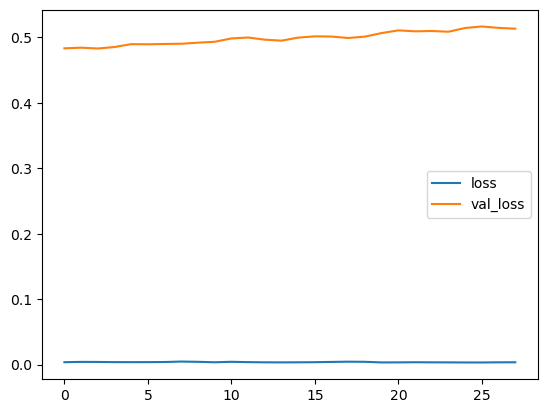

In [29]:
pd.DataFrame(model.history.history).plot()